In [1]:
# 汽车燃料效率
# 398 samples
# 9 features
#      mpg（燃料效率）、cylinders（发动机里的气缸数量）、displacement（发动机的位移）
#      horsepower（发动机的马力，有缺失值）、weight（汽车的重量）、acceleration（汽车的加速性能）
#      model year（汽车类型的生产年份）、car name（汽车品牌）

In [2]:
# Notice：
# 网页数据呈现形式有两个需要注意的地方，这也是许多 UCI 数据的特点
# 1. 没有表头，我们就在代码中构建 name 列表邦加入到 pd.read_csv 中，否则的话数据第一行就会作为表头
# 2. 数据见用空格来间隔，我们就在 pd.read_csv 加入 delim_whitespace=True 来分列，默认分隔符为逗号
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt 
import math

'''
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
cars = pd.read_csv(url, delim_whitespace=True,names=names) #值与值之间，使用空白字符来指定你想要的分隔符
'''

names =["mpg","cylinders","displacement","horsepower", "weight","acceleration","model year","origin","car name"]
cars = pd.read_csv('auto_mpg.csv', delim_whitespace=True,names=names)

cars.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


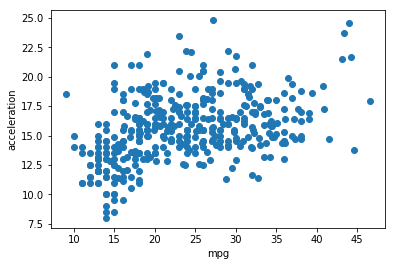

In [3]:
# 对其中的mpg与acceleration绘制散点图
plt.scatter(cars["mpg"], cars["acceleration"]) #mpg燃料效率；acceleration汽车的加速性能
plt.xlabel('mpg')
plt.ylabel('acceleration')#设置坐标轴标签
plt.show()

In [4]:
# 将'mpg','weight'列单独拿出来，作为构建回归分析的X、Y变量
data = cars[['mpg','acceleration']]       # 选取表格中的'mpg','weight'列
data.insert(0, 'Ones', 1)                 # 在data第1-2列之间插入全是1的一列数

# set X (training data) and y (target variable)
cols = data.shape[1]                      # 计算data的列数，在这里cols为3
X = data.iloc[:,0:cols-1] 
y = data.iloc[:,cols-1:cols]
data.head()

,Ones,mpg,acceleration
0,1,18.0,12.0
1,1,15.0,11.5
2,1,18.0,11.0
3,1,16.0,12.0
4,1,17.0,10.5


In [5]:
X.head()

,Ones,mpg
0,1,18.0
1,1,15.0
2,1,18.0
3,1,16.0
4,1,17.0


In [6]:
y.head()

,acceleration
0,12.0
1,11.5
2,11.0
3,12.0
4,10.5


In [7]:
# 最小二乘法 / 正规方程 求解回归，并计算损失函数
X = np.matrix(X.values) 
y = np.matrix(y.values) #首先要把变量由data frames 转变为矩阵形式
from numpy.linalg import inv
from numpy import dot
theta_n = dot(dot(inv(dot(X.T, X)), X.T),y) # theta = (X'X)^(-1)X'Y
print(theta_n)

def computeCost(X, y, theta): 
    inner = np.power(((X * theta.T) - y), 2)
    return  np.sum(inner) / (2 * len(X))
X.shape, theta_n.shape, y.shape
lr_cost = computeCost(X, y, theta_n.T)
print(lr_cost)

[[12.0811332]
 [ 0.1482892]]
3.1228871749375333


In [8]:
# GD法求解回归函数
def gradientDescent(X, y, theta, alpha, iters):  
    temp = np.matrix(np.zeros(theta.shape)) #构建零值矩阵
    parameters = int(theta.ravel().shape[1]) #计算需要求解的参数个数
    cost = np.zeros(iters) #构建iters个0的数组

    for i in range(iters):
        error = (X * theta.T) - y #计算hθ(x)-y

        for j in range(parameters):
            term = np.multiply(error, X[:,j]) #计算两矩阵(hθ(x)-y)x
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term)) 

        theta = temp
        cost[i] = computeCost(X, y, theta)

    return theta, cost

In [9]:
alpha = 0.001 
iters = 100000
theta = np.matrix(np.array([0,0]))
# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters) 
g 

matrix([[12.0805357 ,  0.14831209]])

In [10]:
computeCost(X, y, g) 

3.122887192656292

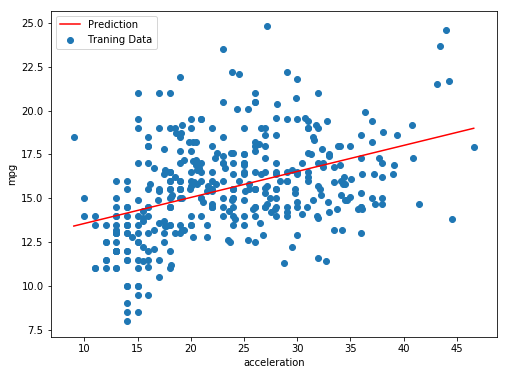

In [11]:
# 分别使用 plot、scatter 命令建立折线和散点
# 并使用 fig, ax = plt.subplots() 将两个图放在一起
x = np.linspace(data.mpg.min(), data.mpg.max(), 100) #创建mpg数据的等差数列
f = g[0, 0] + g[0, 1] * x #依据拟合方程创建f值
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, f, 'r', label='Prediction') 
ax.scatter(data.mpg, data.acceleration, label='Traning Data') 
ax.legend(loc=2) #图例
ax.set_xlabel('acceleration') 
ax.set_ylabel('mpg') 
plt.show()

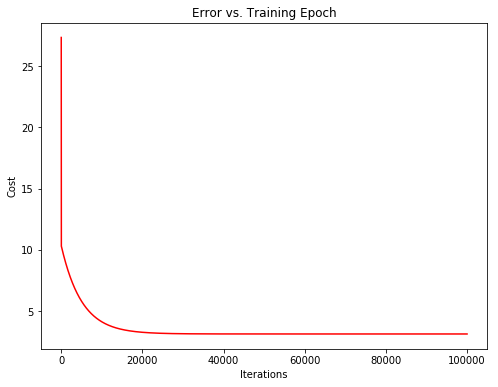

In [12]:
fig, bx = plt.subplots(figsize=(8,6))
bx.plot(np.arange(iters), cost, 'r') 
bx.set_xlabel('Iterations') 
bx.set_ylabel('Cost') 
bx.set_title('Error vs. Training Epoch') 
plt.show()